In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

###前處理###

In [2]:
df = pd.read_csv('HR_Analytics.csv')
df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0


In [3]:
df.drop(['EmpID'], axis=1, inplace=True)
df.drop(['Over18'], axis=1, inplace=True)
df.drop(['EmployeeCount'], axis=1, inplace=True)
df.drop(['StandardHours'], axis=1, inplace=True)
df.drop(['EmployeeNumber'], axis=1, inplace=True)

In [4]:
results = []

for col in df.columns:
    # 判斷類別/連續變數
    if df[col].dtype == "object" or df[col].nunique() <= 10:
        var_type = "Categorical"
    else:
        var_type = "Continuous"
    
    results.append([col, var_type, df[col].nunique()])

recommend_df = pd.DataFrame(results, columns=["Feature", "Type", "Unique Values"])

# 篩選連續變數
continuous_vars = recommend_df[recommend_df["Type"] == "Continuous"]
print("Continuous variables:")
print(continuous_vars)

# 篩選非連續變數
categorical_vars = recommend_df[recommend_df["Type"] == "Categorical"]
print("\nCategorical variables:")
print(categorical_vars)

Continuous variables:
                    Feature        Type  Unique Values
0                       Age  Continuous             43
4                 DailyRate  Continuous            886
6          DistanceFromHome  Continuous             29
11               HourlyRate  Continuous             71
17            MonthlyIncome  Continuous           1349
19              MonthlyRate  Continuous           1427
22        PercentSalaryHike  Continuous             15
26        TotalWorkingYears  Continuous             40
29           YearsAtCompany  Continuous             37
30       YearsInCurrentRole  Continuous             19
31  YearsSinceLastPromotion  Continuous             16
32     YearsWithCurrManager  Continuous             18

Categorical variables:
                     Feature         Type  Unique Values
1                   AgeGroup  Categorical              5
2                  Attrition  Categorical              2
3             BusinessTravel  Categorical              4
5          

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1480 non-null   int64  
 1   AgeGroup                  1480 non-null   object 
 2   Attrition                 1480 non-null   object 
 3   BusinessTravel            1480 non-null   object 
 4   DailyRate                 1480 non-null   int64  
 5   Department                1480 non-null   object 
 6   DistanceFromHome          1480 non-null   int64  
 7   Education                 1480 non-null   int64  
 8   EducationField            1480 non-null   object 
 9   EnvironmentSatisfaction   1480 non-null   int64  
 10  Gender                    1480 non-null   object 
 11  HourlyRate                1480 non-null   int64  
 12  JobInvolvement            1480 non-null   int64  
 13  JobLevel                  1480 non-null   int64  
 14  JobRole 

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,2.724324,65.845270,2.729730,2.064865,2.725000,6504.985811,...,3.153378,2.708784,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,1.092579,20.328266,0.713007,1.105574,1.104137,4700.261400,...,0.360474,1.081995,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2922.250000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4933.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8383.750000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df = df.dropna(axis=0, how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1423 entries, 0 to 1479
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1423 non-null   int64  
 1   AgeGroup                  1423 non-null   object 
 2   Attrition                 1423 non-null   object 
 3   BusinessTravel            1423 non-null   object 
 4   DailyRate                 1423 non-null   int64  
 5   Department                1423 non-null   object 
 6   DistanceFromHome          1423 non-null   int64  
 7   Education                 1423 non-null   int64  
 8   EducationField            1423 non-null   object 
 9   EnvironmentSatisfaction   1423 non-null   int64  
 10  Gender                    1423 non-null   object 
 11  HourlyRate                1423 non-null   int64  
 12  JobInvolvement            1423 non-null   int64  
 13  JobLevel                  1423 non-null   int64  
 14  JobRole      

In [8]:
for col in df.columns:
    if df[col].dtype == "object" or df[col].nunique() <= 10:
        print(f"=== {col} ===")
        print(df[col].value_counts())
        print()

=== AgeGroup ===
AgeGroup
26-35    590
36-45    449
46-55    223
18-25    117
55+       44
Name: count, dtype: int64

=== Attrition ===
Attrition
No     1193
Yes     230
Name: count, dtype: int64

=== BusinessTravel ===
BusinessTravel
Travel_Rarely        998
Travel_Frequently    270
Non-Travel           148
TravelRarely           7
Name: count, dtype: int64

=== Department ===
Department
Research & Development    924
Sales                     437
Human Resources            62
Name: count, dtype: int64

=== Education ===
Education
3    554
4    384
2    274
1    166
5     45
Name: count, dtype: int64

=== EducationField ===
EducationField
Life Sciences       586
Medical             446
Marketing           155
Technical Degree    129
Other                81
Human Resources      26
Name: count, dtype: int64

=== EnvironmentSatisfaction ===
EnvironmentSatisfaction
3    438
4    433
2    282
1    270
Name: count, dtype: int64

=== Gender ===
Gender
Male      854
Female    569
Name: count, 

In [9]:
# List of categorical column names
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# List of numeric column names
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()


print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")

Categorical columns (10): ['AgeGroup', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'SalarySlab', 'OverTime']
Numeric columns (23): ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [10]:
df['Attrition_flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

/var/folders/dn/6ynt_kvj7q16x61wy32n8bmr0000gn/T/ipykernel_58048/3222665786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition_flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [14]:
def get_bar_chart(df, target_col, label='Attrition'):

    target_col = target_col  # 👈 想分析的欄位

    # 計算 Attrition Yes / No 各類別數量
    attr_counts = df.groupby([target_col, label]).size().unstack(fill_value=0)

    categories = attr_counts.index     # X 軸分類
    labels = attr_counts.columns       # Yes / No

    x = np.arange(len(categories))     # X 座標
    width = 0.35                       # 每個 bar 的寬
    multiplier = 0

    colors = {'No':'#c8bab1', 'Yes':'#f19c79'}

    fig, ax = plt.subplots(figsize=(10,6), dpi=200, layout='constrained')

    for attr in labels:
        offset = width * multiplier
        values = attr_counts[attr]
        rects = ax.bar(x + offset, values, width, label=f"Attrition: {attr}", color=colors.get(attr, '#7F8C8D'))  # fallback 灰色)
        
        # 美化數字顯示
        ax.bar_label(rects, padding=3, fontsize=10, fontweight='bold')
        
        multiplier += 1

    # 圖表設定
    ax.set_title(f"Attrition Distribution by {target_col}", fontsize=14, fontweight='bold')
    ax.set_ylabel('Count')
    ax.set_xticks(x + width/2, categories)
    ax.legend(loc='upper right', ncols=2)
    ax.set_ylim(0, attr_counts.values.max() * 1.15)  # 提供文字空間
    plt.xticks(rotation=20)

    plt.show()
    

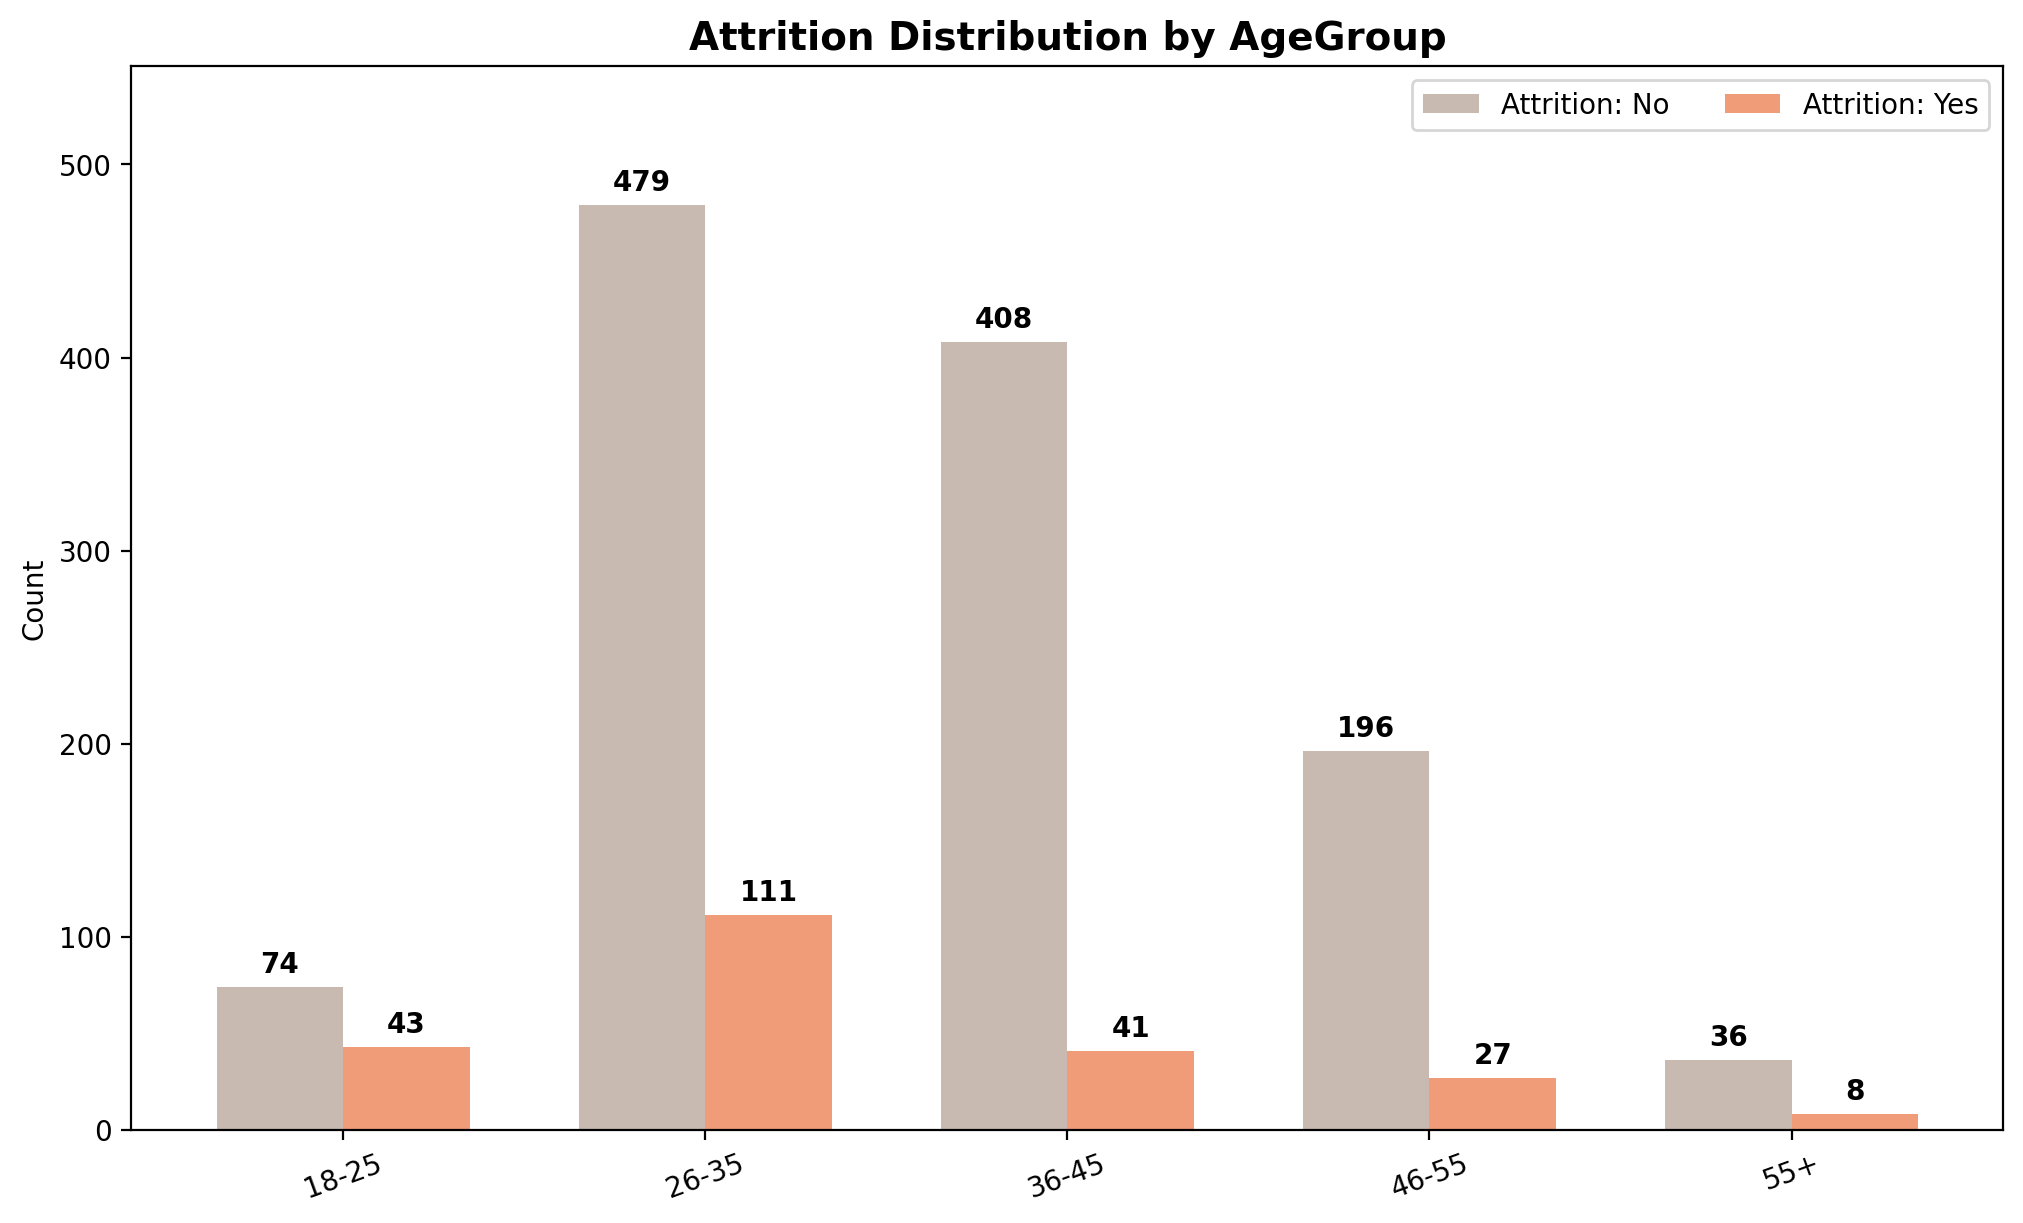

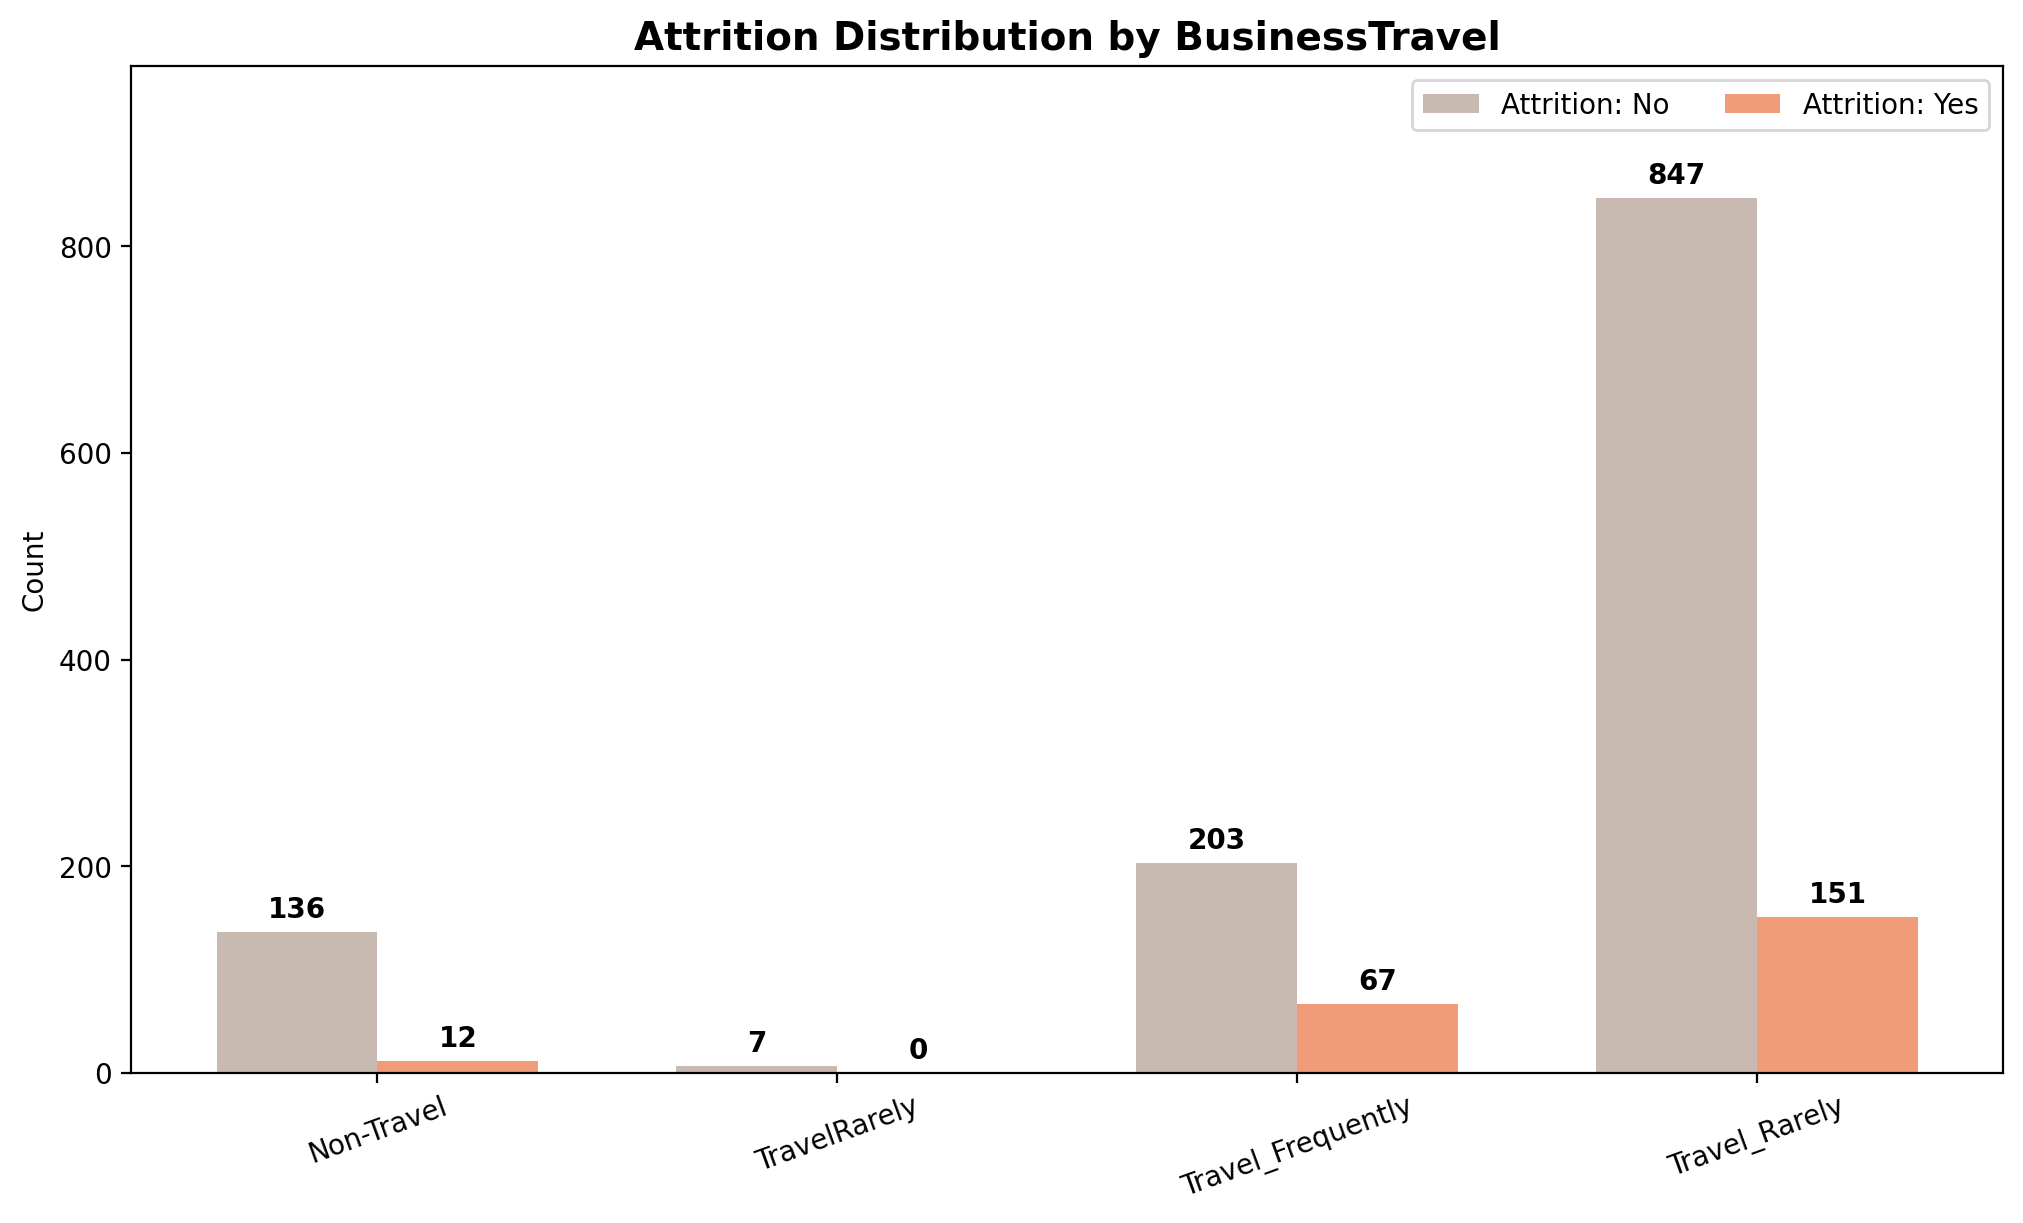

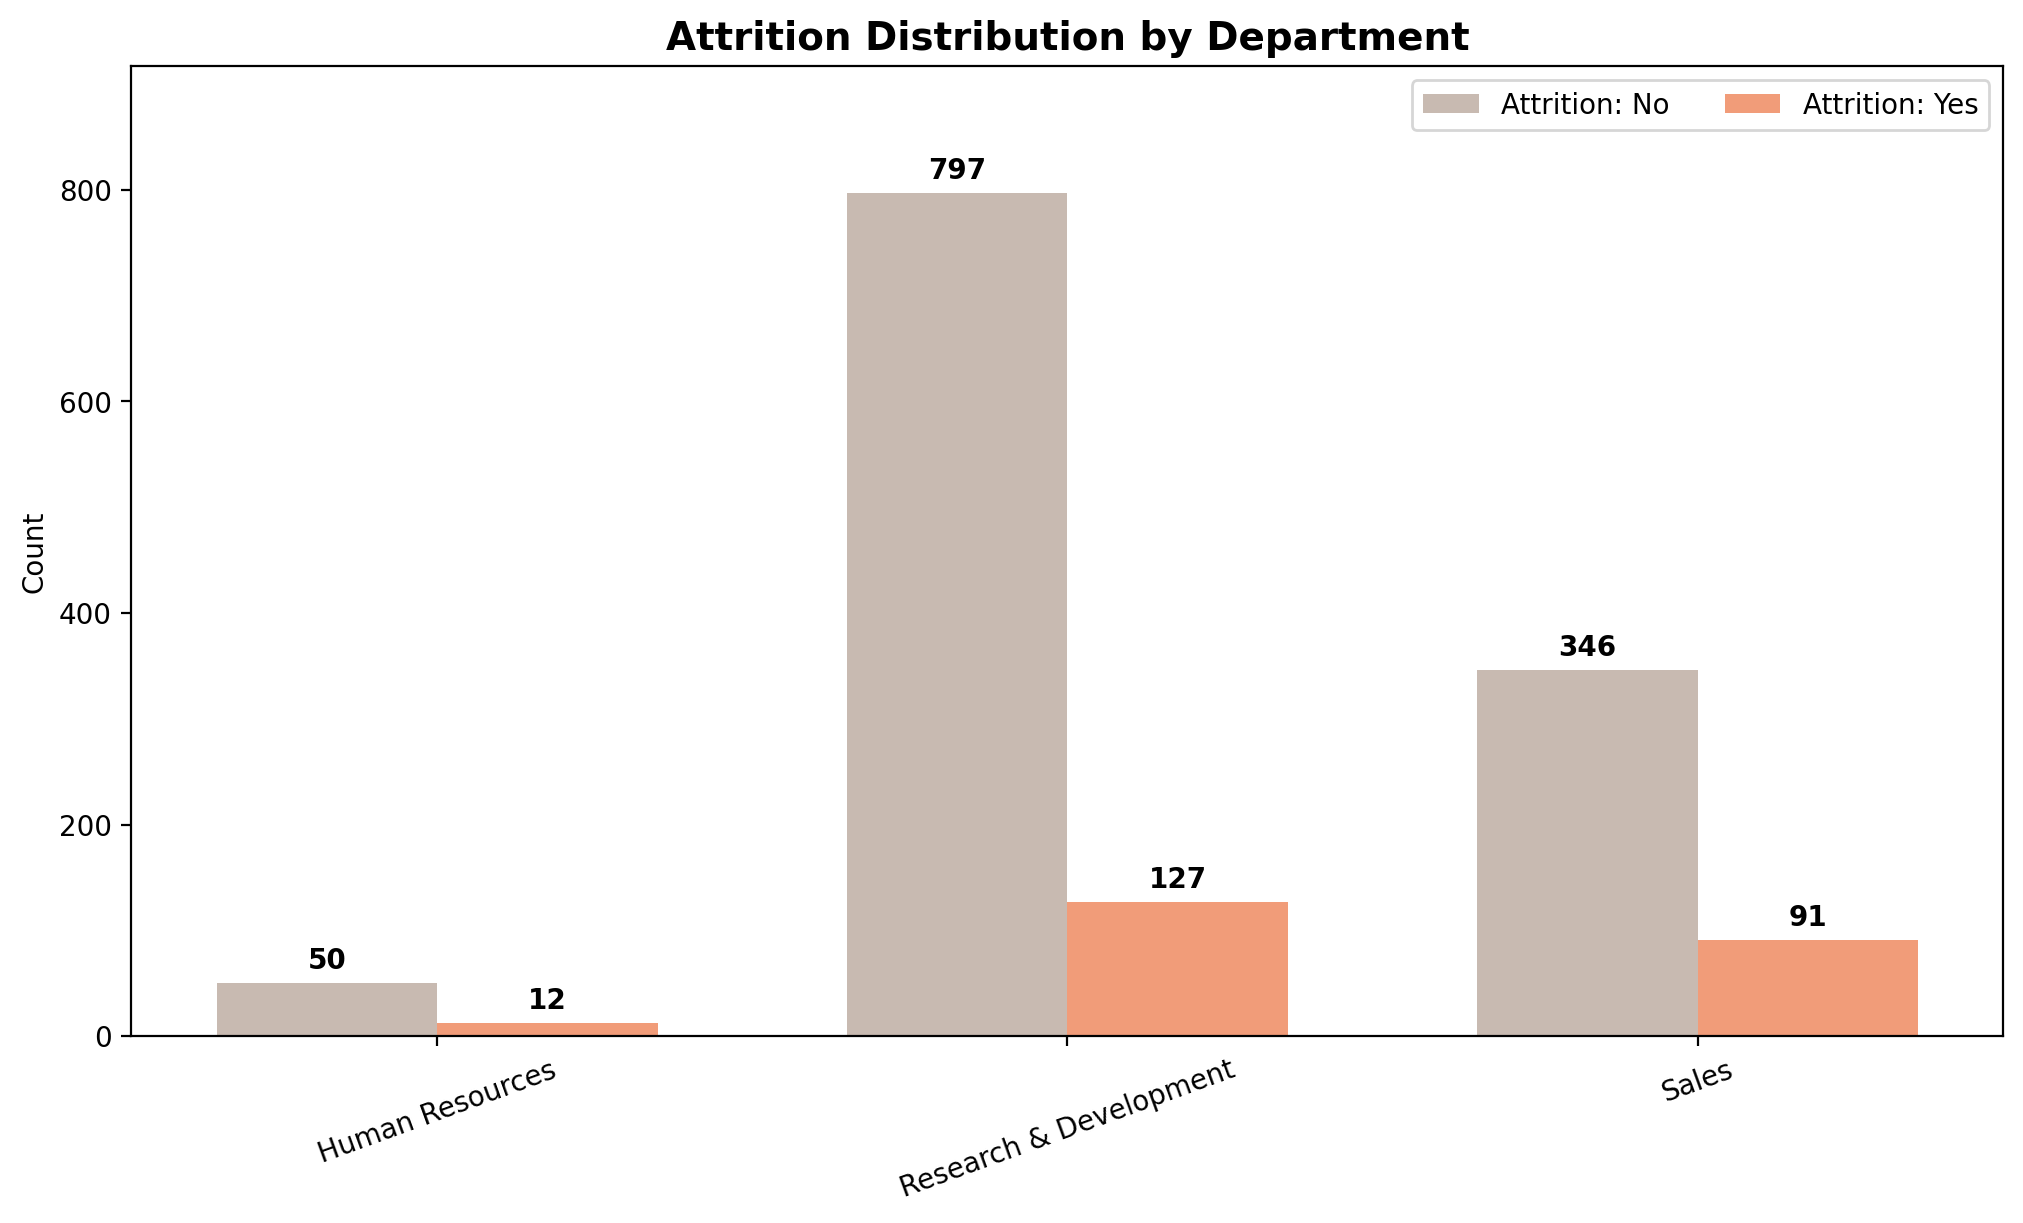

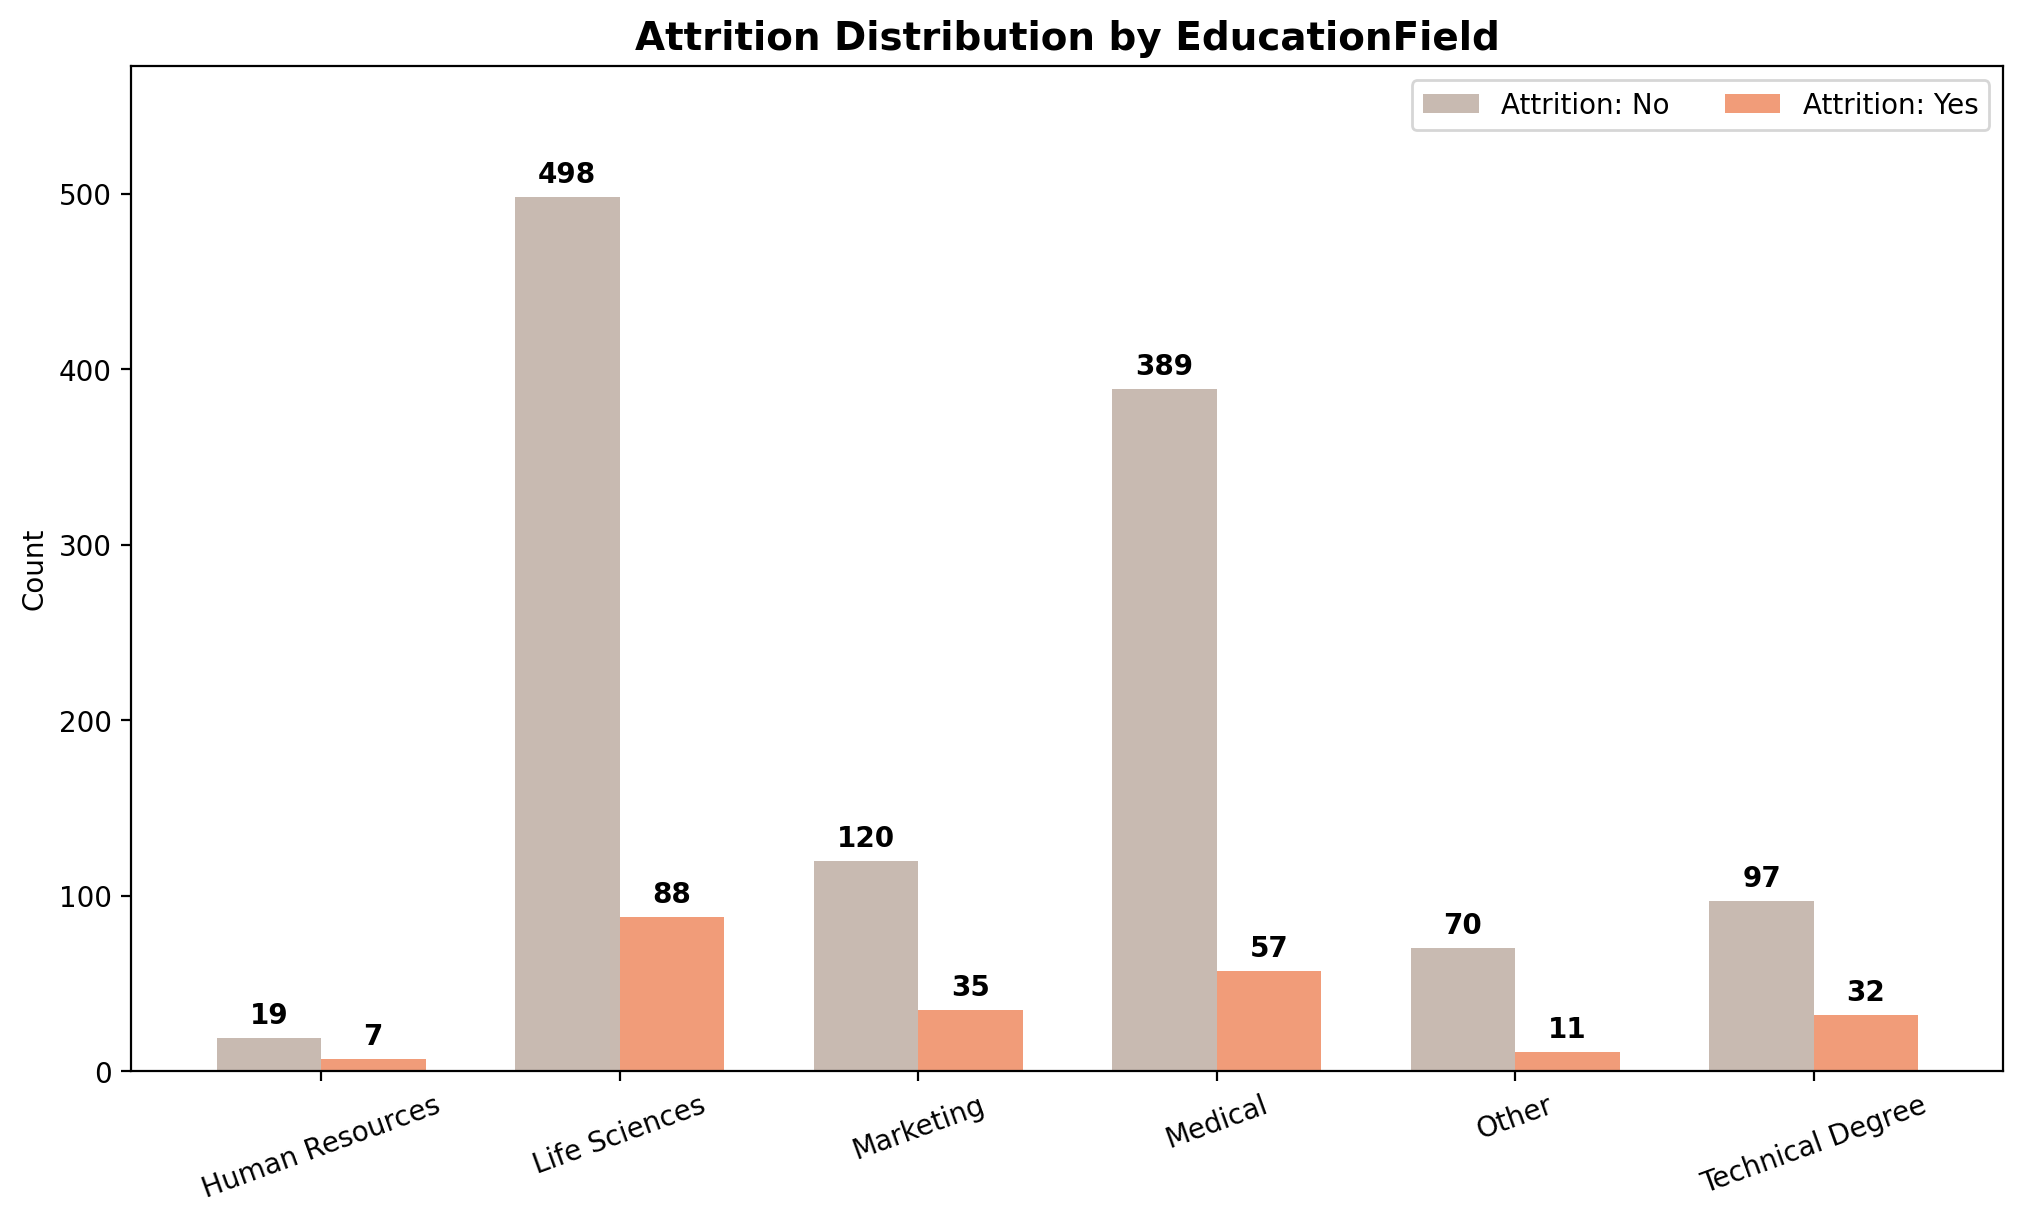

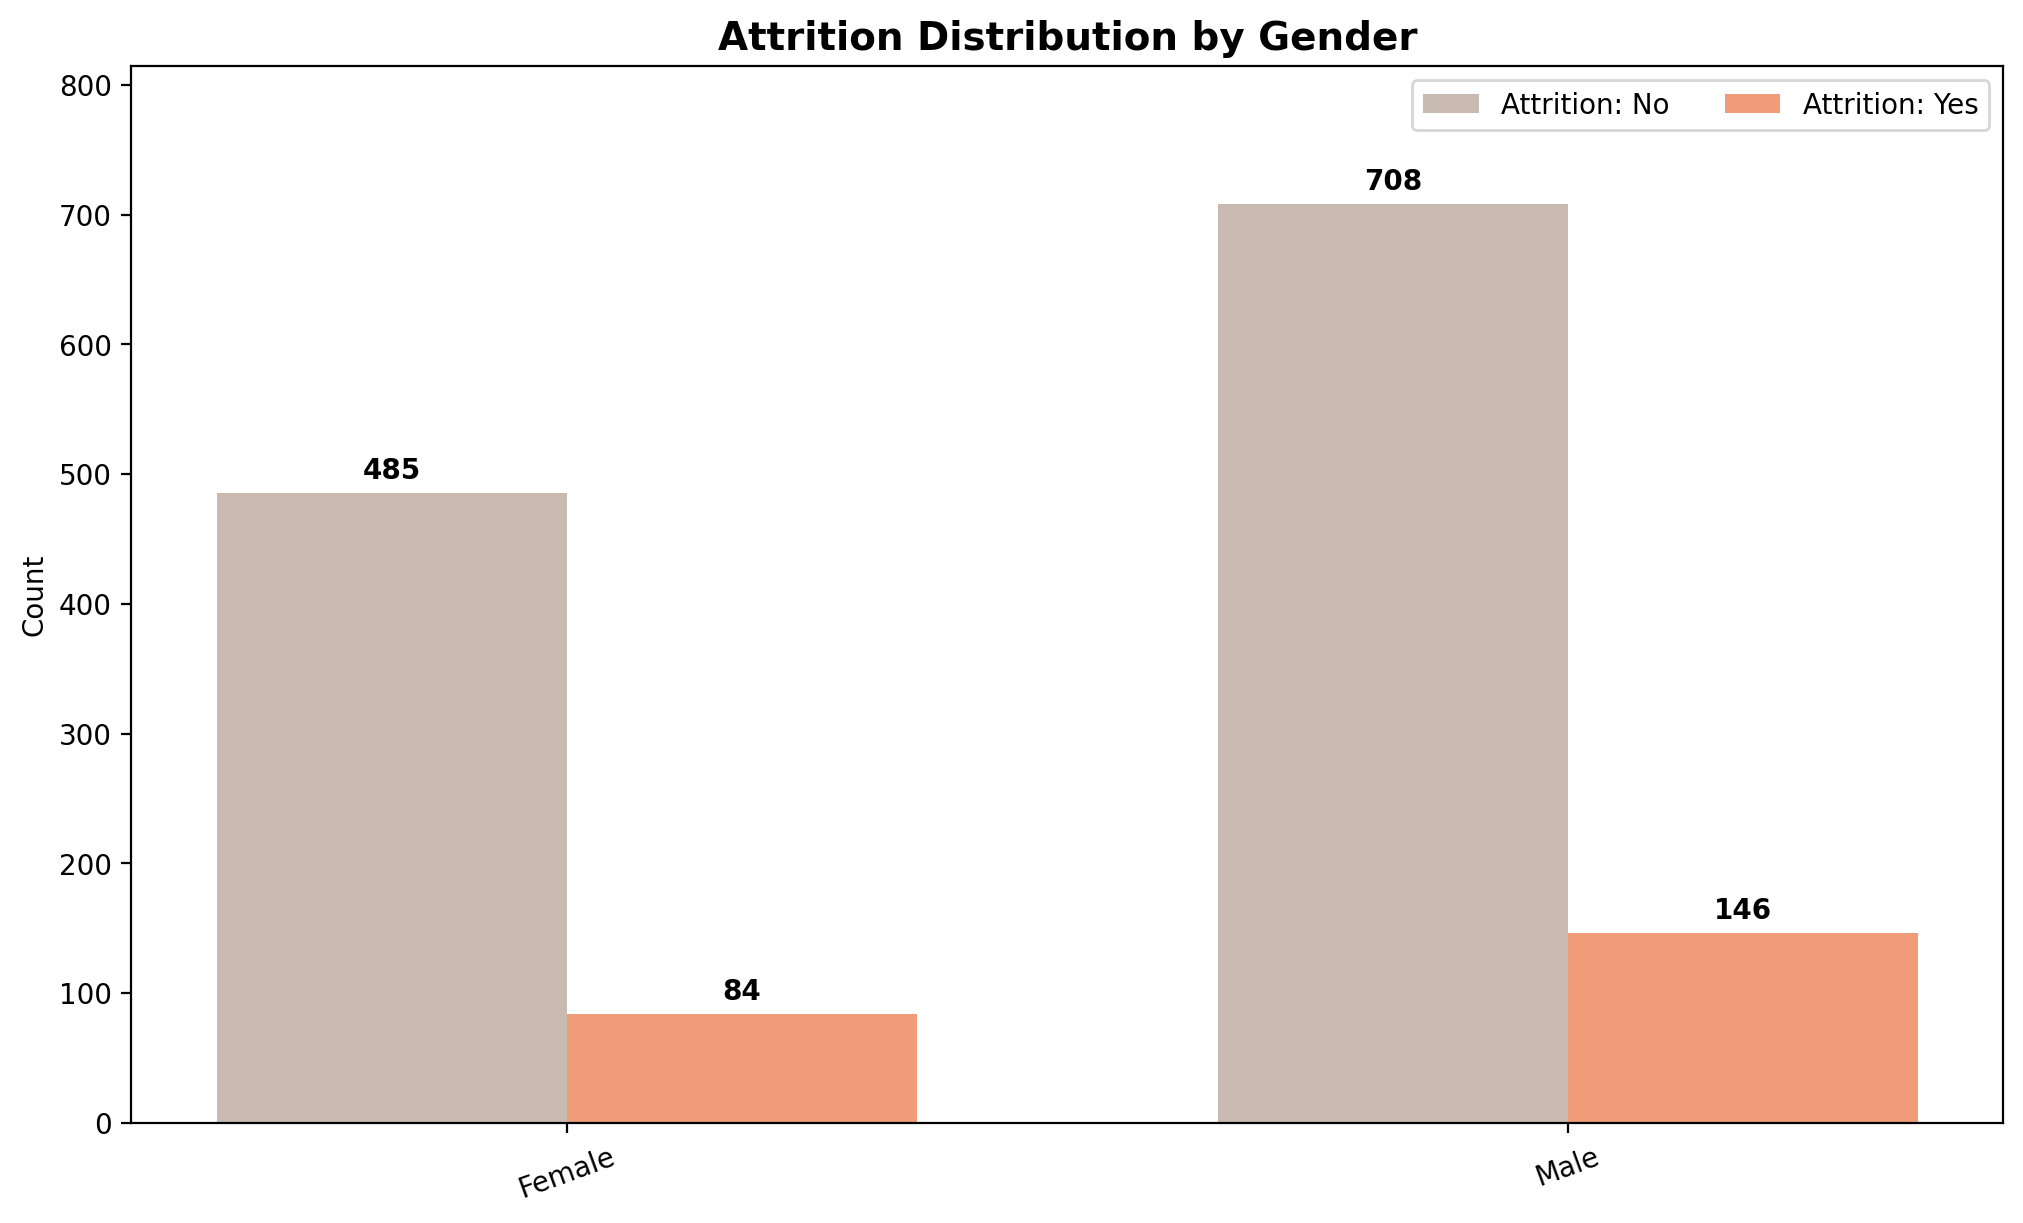

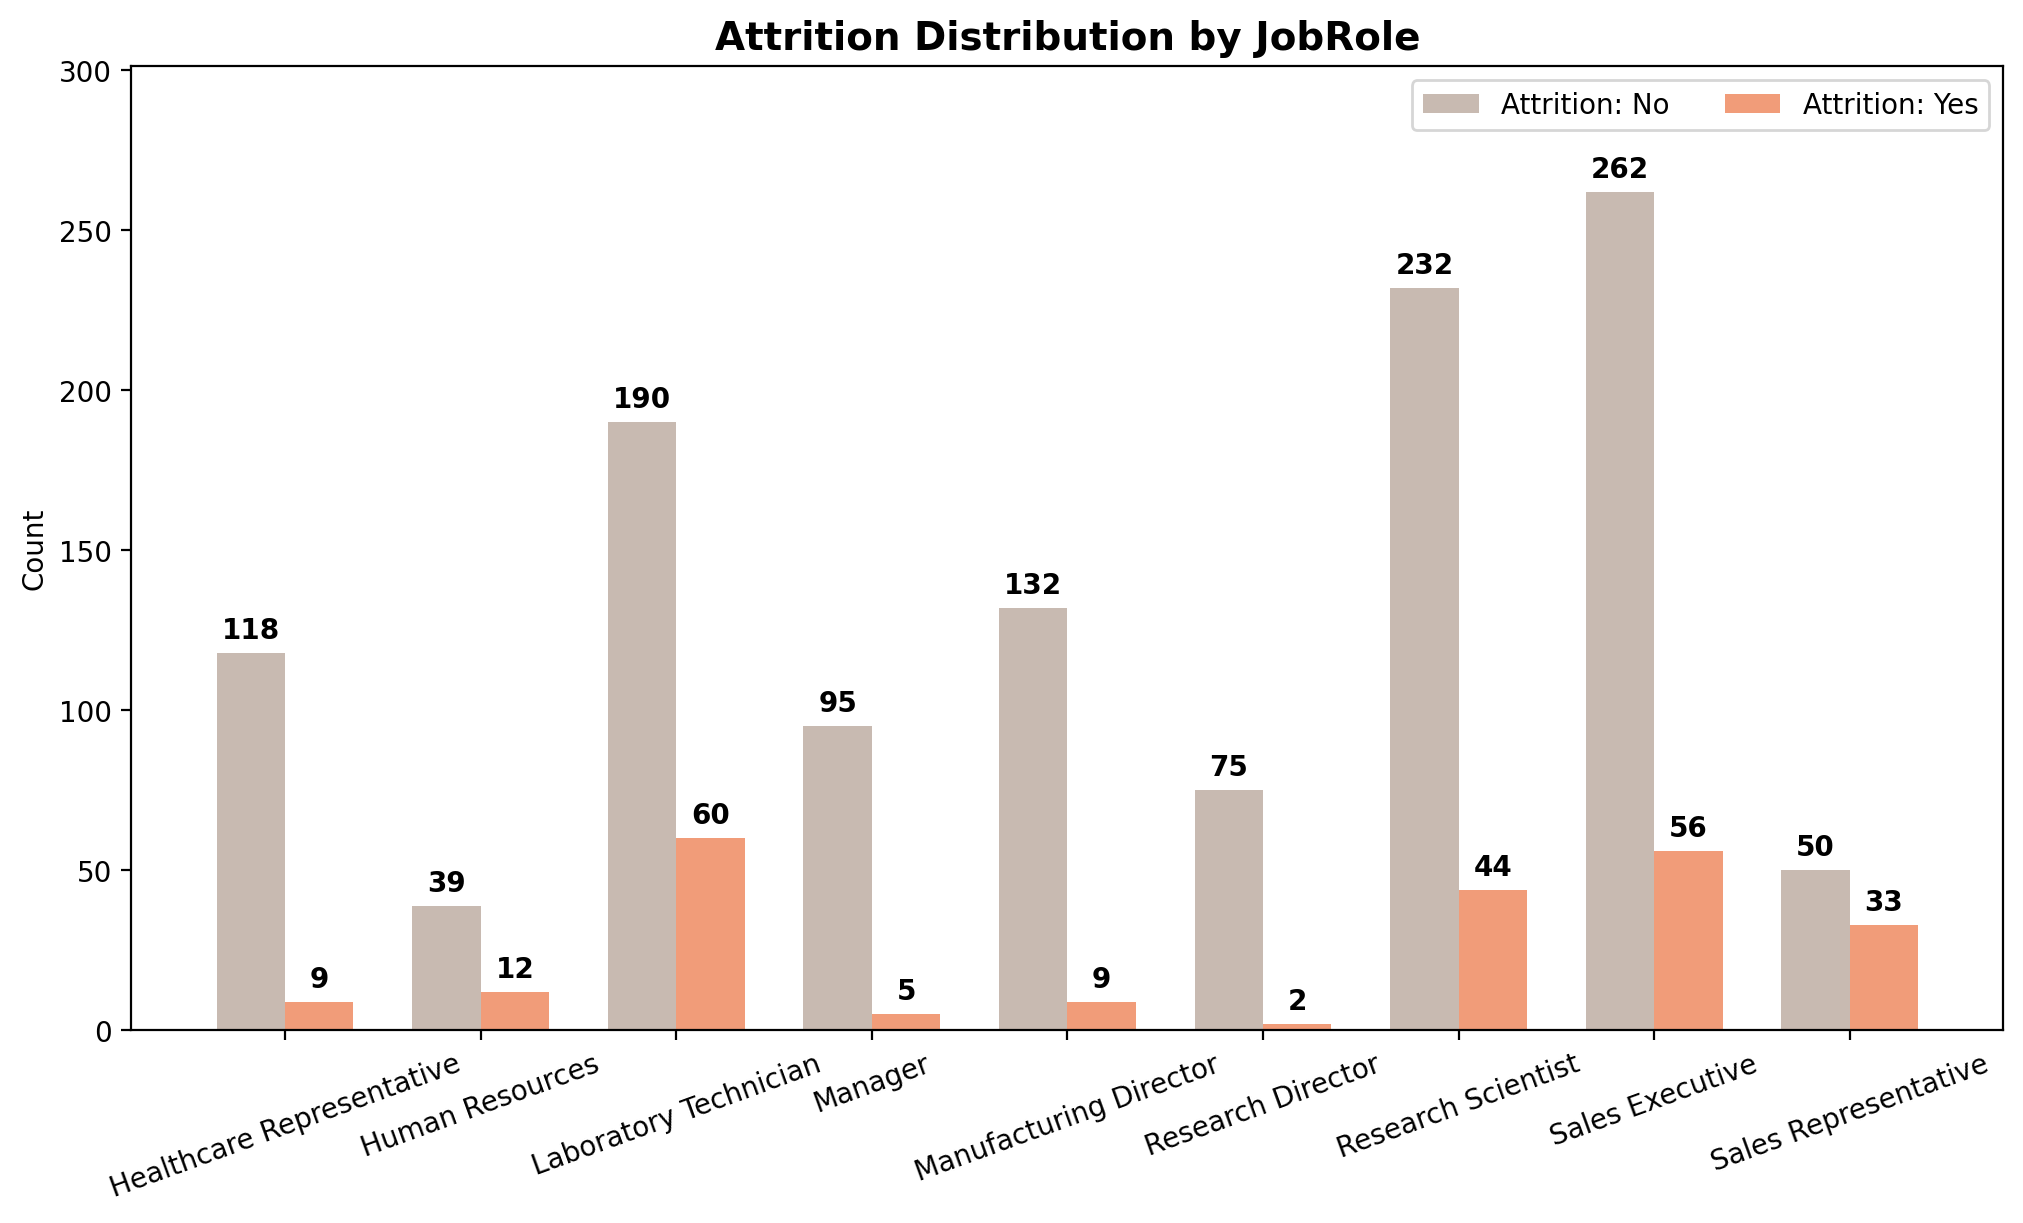

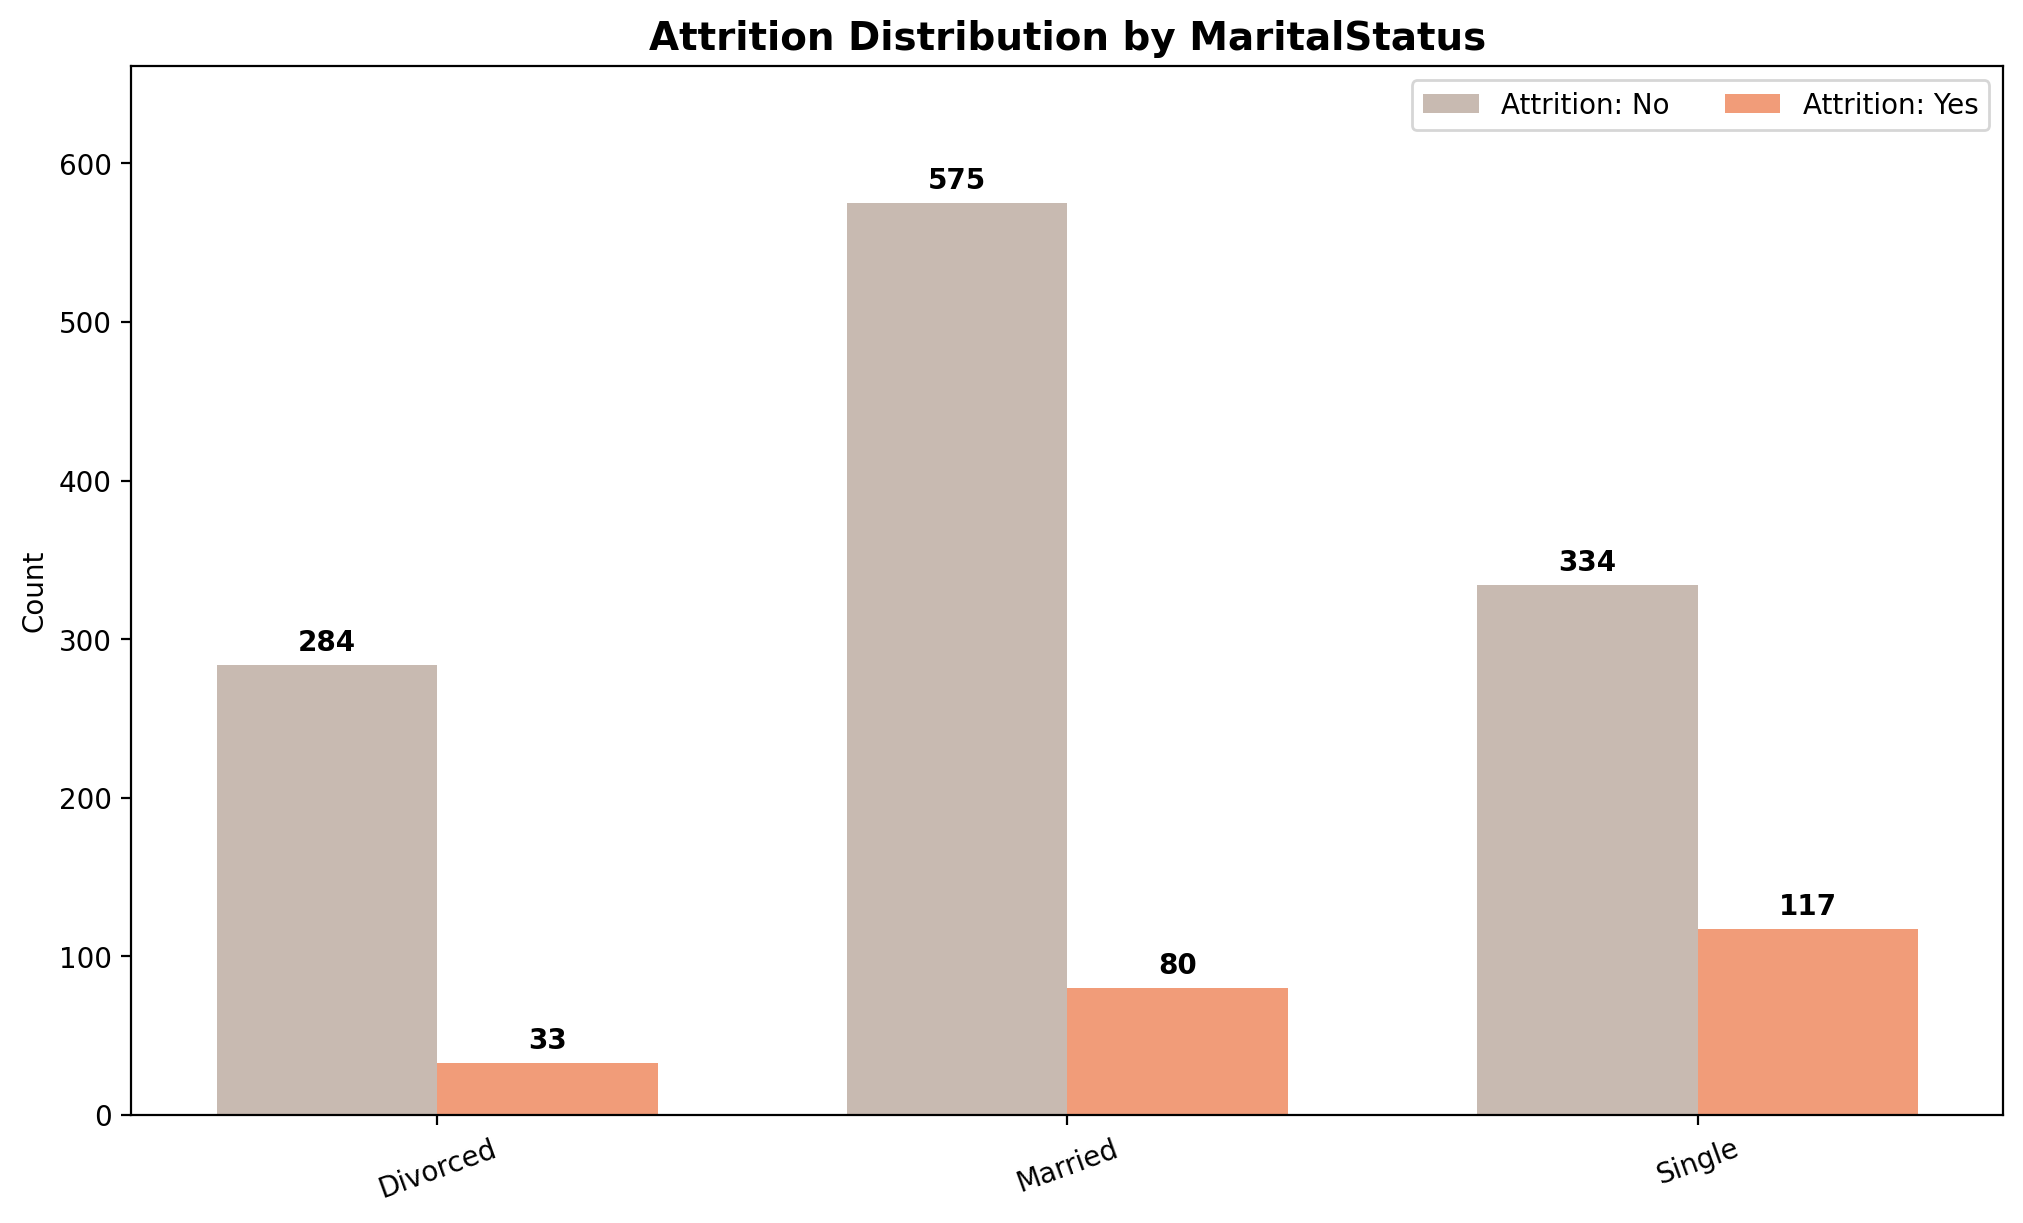

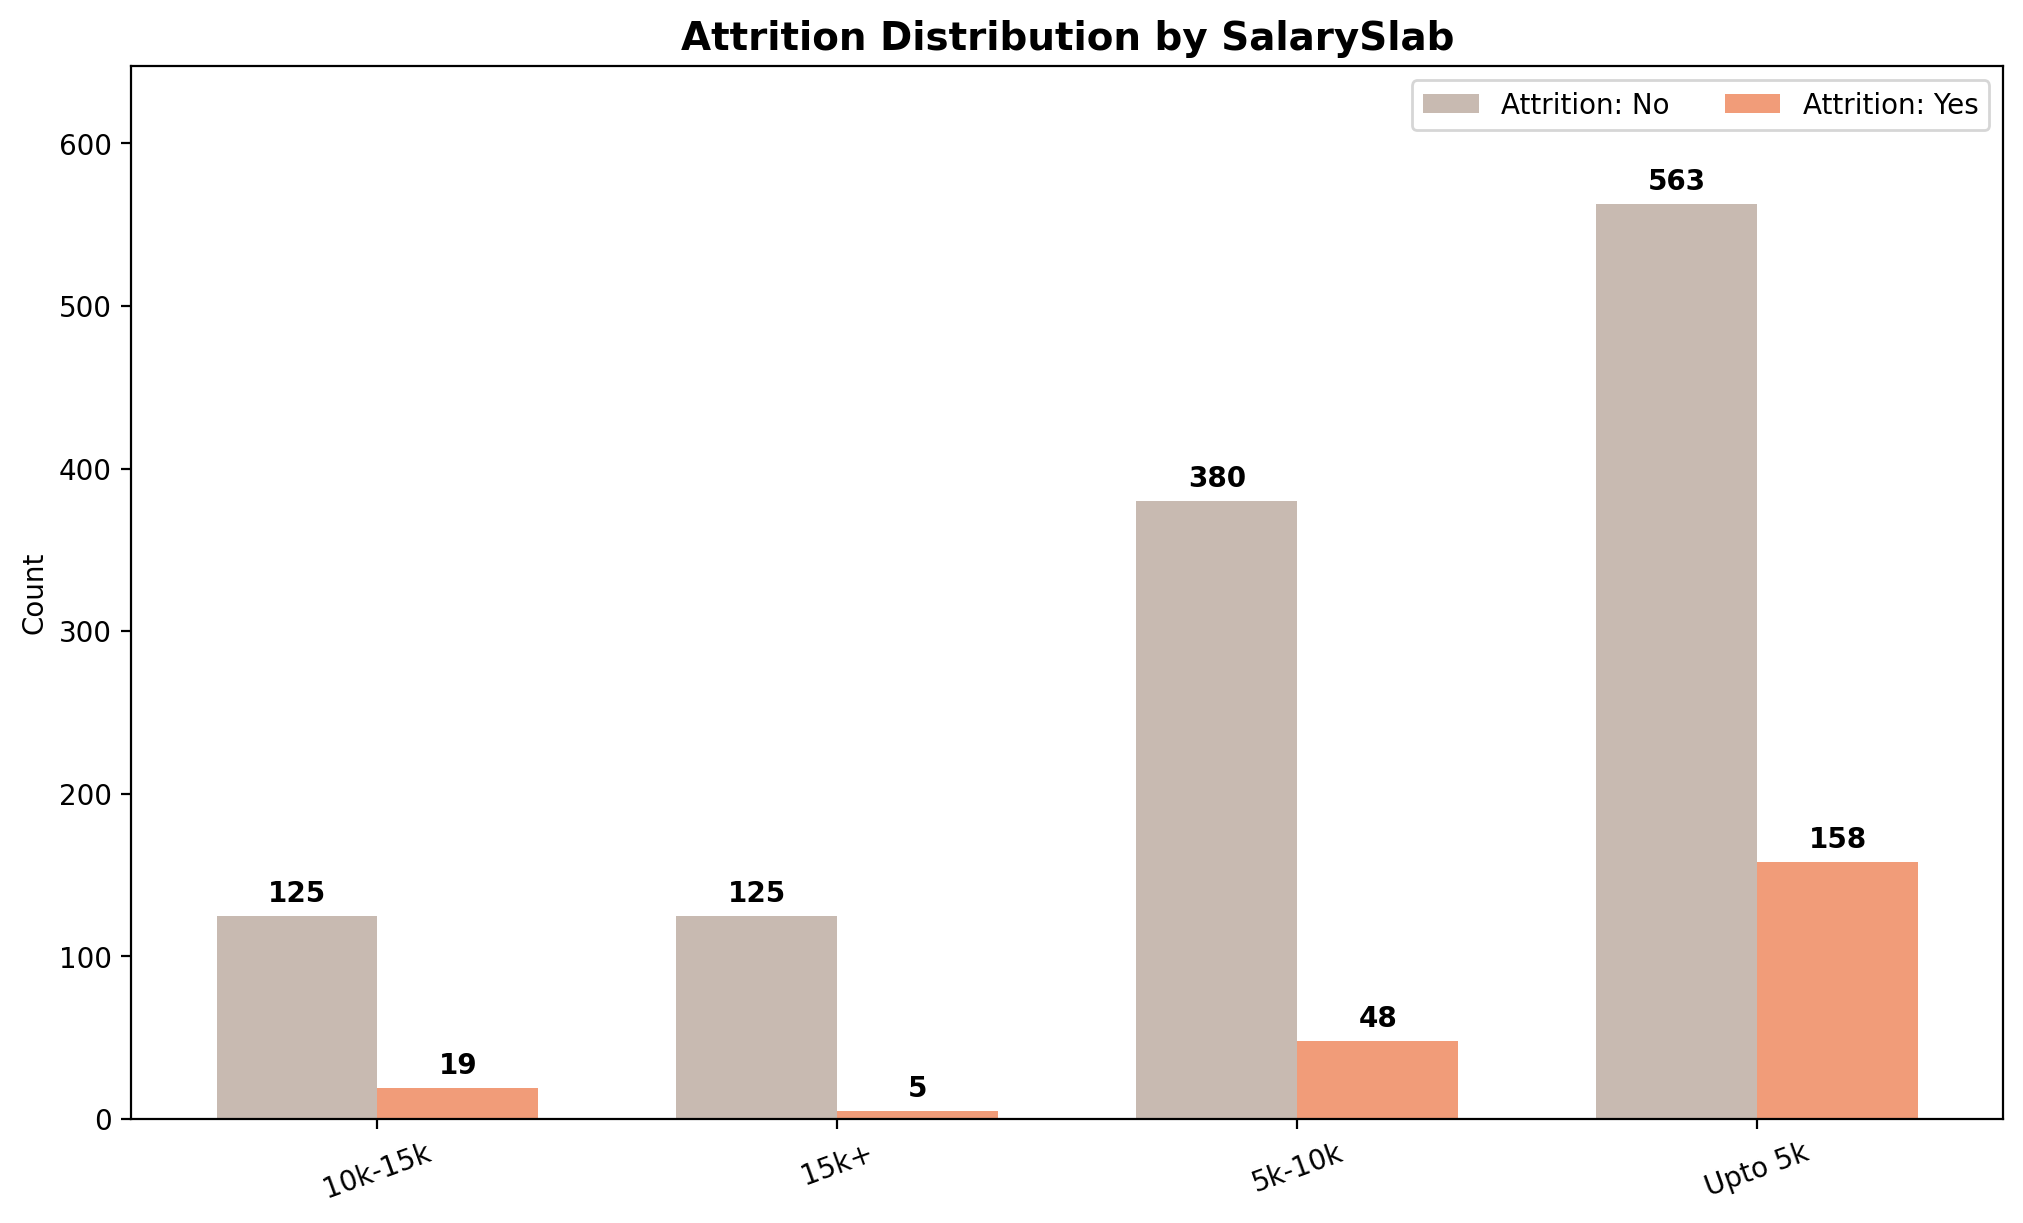

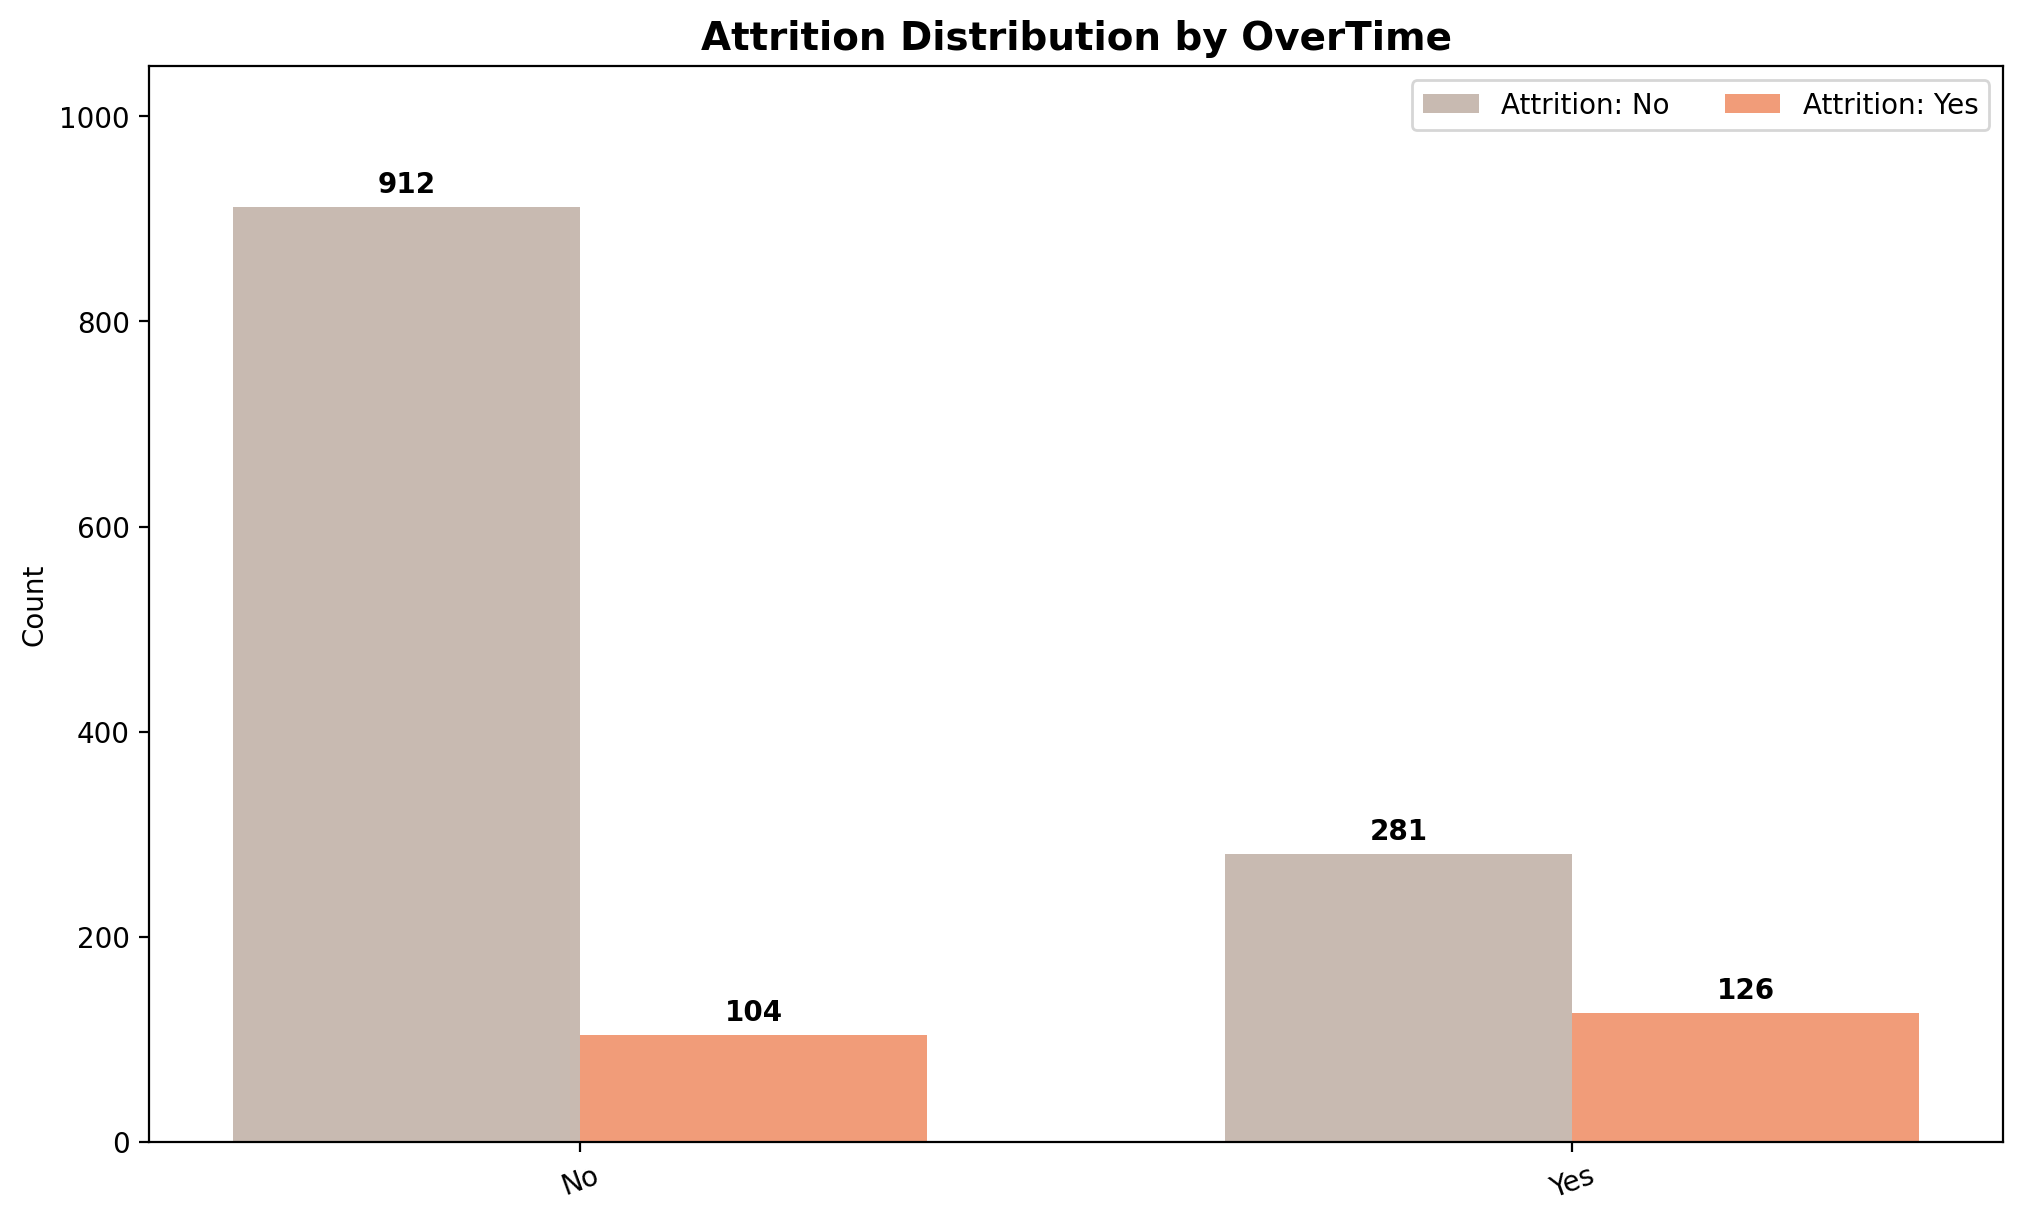

In [15]:
for col in df.select_dtypes(include='object').columns:
    if col != 'Attrition':  # 排除目標欄位自己
        get_bar_chart(df, col)

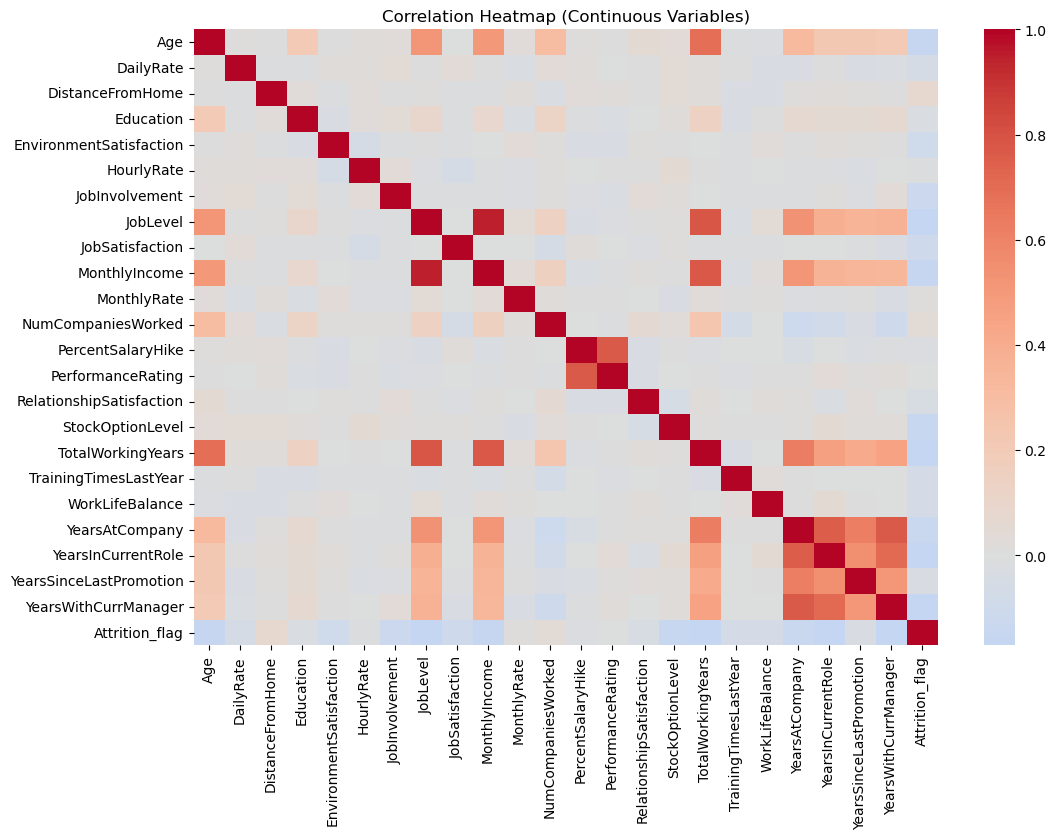

In [16]:
# 選出數值變數
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 計算相關係數
corr = df[num_cols].corr()

# 畫出熱圖
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Continuous Variables)")
plt.show()

In [25]:
#df.drop(['Age', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany'], axis=1, inplace=True)
df.drop('Attrition_flag', axis=1, inplace=True)
# Drop the High correlation columns

/var/folders/dn/6ynt_kvj7q16x61wy32n8bmr0000gn/T/ipykernel_58048/1801279566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Attrition_flag', axis=1, inplace=True)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1423 entries, 0 to 1479
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AgeGroup                  1423 non-null   object 
 1   Attrition                 1423 non-null   object 
 2   BusinessTravel            1423 non-null   object 
 3   DailyRate                 1423 non-null   int64  
 4   Department                1423 non-null   object 
 5   DistanceFromHome          1423 non-null   int64  
 6   Education                 1423 non-null   int64  
 7   EducationField            1423 non-null   object 
 8   EnvironmentSatisfaction   1423 non-null   int64  
 9   Gender                    1423 non-null   object 
 10  HourlyRate                1423 non-null   int64  
 11  JobInvolvement            1423 non-null   int64  
 12  JobLevel                  1423 non-null   int64  
 13  JobRole                   1423 non-null   object 
 14  JobSatisfacti

In [27]:
df.to_csv('HR_Analytics_cleaned.csv', index=False)

A positive outcome: A 60:40 split is a significant improvement over heavily imbalanced ratios, such as the 70:30 or 80:20 splits that are common in many industries, especially at senior levels.